# Feedback Loops in Adaptive Learning Systems

In [1]:
%load_ext autoreload
%autoreload 2

In [305]:
%matplotlib  inline
from collections import OrderedDict, namedtuple
from math import sqrt, log
from random import random, randint, choice
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from models import create_proxy_student, create_true_student
from models import LearningSystem
from models import proxy_objective_solved_tasks
from models import proxy_objective_successful_tasks
from models import proxy_objective_target_skill
from models import proxy_objective_effective_tasks
from simulation import simulate_student, simulate_system
from evaluation import evaluate_system, evaluate_system_once
from plotting import plot_student, plot_system

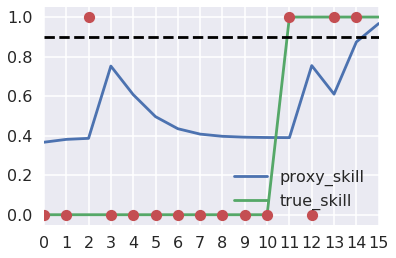

In [267]:
plot_student(simulate_student(i_student=0))

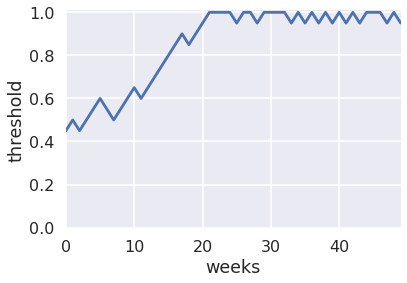

In [296]:
results = simulate_system(
    n_students=100,
    proxy_objective=proxy_objective_solved_tasks)
plot_system(results, details=False)

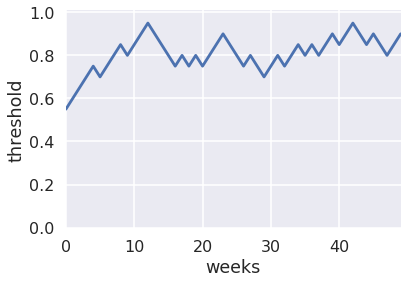

In [301]:
results = simulate_system(
    n_students=100,
    proxy_objective=proxy_objective_effective_tasks)
plot_system(results, details=False)

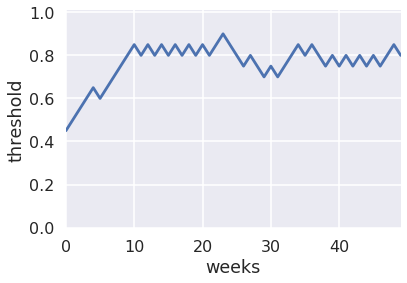

In [276]:
target_85 = lambda s: proxy_objective_target_skill(s, 0.85)
results = simulate_system(proxy_objective=target_85)
plot_system(results, details=False)

In [29]:
evaluate_system(
    n_iters_system=50,
    n_students=20,
    noise=0.2,
    proxy_objective=proxy_objective_effective_tasks)

0.08333333333333333

There are no anomalies if the paitence is infinite (or high enough):

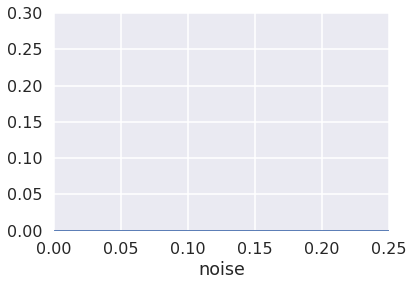

In [4]:
noises = np.linspace(0, 0.25, 10)
results = [
    evaluate_system(
        n_iters_system=200,
        n_students=100,
        patience=100,
        noise=noise,
        proxy_objective=proxy_objective_effective_tasks)
    for noise in noises]
df = pd.DataFrame({'noise': noises, 'result': results})
df.set_index('noise').result.plot(ylim=(0,0.3))

If there is no noise, the anomalies don't occur (unless the impatience is extreme):

(-0.08, 1.0)

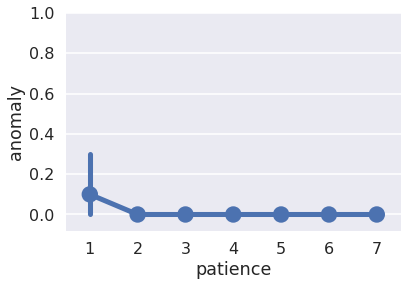

In [316]:
patiences, anomalies = [], []
for patience in range(1, 8):
    for i_experiment in range(10):
        patiences.append(patience)
        anomalies.append(
            evaluate_system_once(
                n_iters_system=50,
                n_students=20,
                patience=patience,
                noise=0,
                proxy_objective=proxy_objective_effective_tasks))
df = pd.DataFrame({'patience': patiences, 'anomaly': anomalies})
#df.set_index('patience').result.plot(ylim=(0,0.3))
ax = sns.pointplot(x='patience', y='anomaly', data=df)
ax.set_ylim(-0.08, 1.0)

However, once there is both the noise and impatience, the anomalies occur:

(0, 0.3)

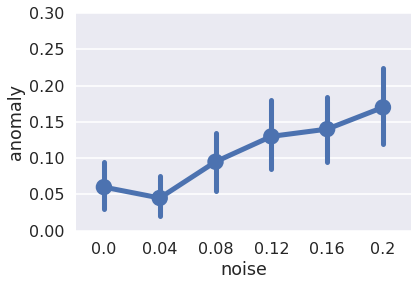

In [355]:
noises, anomalies = [], []
for noise in np.linspace(0, 0.2, 6):
    for i_experiment in range(200):
        noises.append(noise)
        anomalies.append(
            evaluate_system_once(
                n_iters_system=50,
                n_students=100,
                patience=3,
                noise=noise,
                proxy_objective=proxy_objective_effective_tasks))
df = pd.DataFrame({'noise': noises, 'anomaly': anomalies})
ax = sns.pointplot(x='noise', y='anomaly', data=df)
ax.set_ylim(0, 0.3)

The higher the impatience, the higher probability of anomalies:

(0, 0.3)

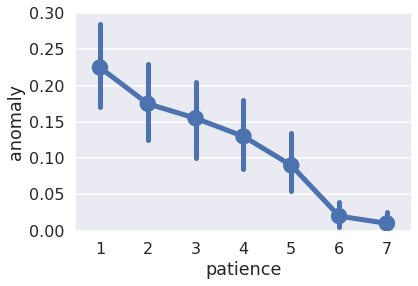

In [356]:
patiences, anomalies = [], []
for patience in range(1, 8):
    for i_experiment in range(200):
        patiences.append(patience)
        anomalies.append(
            evaluate_system_once(
                n_iters_system=50,
                n_students=100,
                patience=patience,
                noise=0.2,
                proxy_objective=proxy_objective_effective_tasks))
df = pd.DataFrame({'patience': patiences, 'anomaly': anomalies})
ax = sns.pointplot(x='patience', y='anomaly', data=df)
ax.set_ylim(0, 0.3)

The results are not sensitive to the number of students in the system:

(0, 0.3)

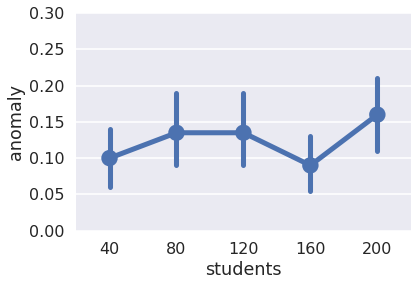

In [357]:
ns, anomalies = [], []
for n_students in range(40, 201, 40):
    for i_experiment in range(200):
        ns.append(n_students)
        anomalies.append(
            evaluate_system_once(
                n_iters_system=50,
                n_students=n_students,
                patience=3,
                noise=0.2,
                proxy_objective=proxy_objective_effective_tasks))
df = pd.DataFrame({'students': ns, 'anomaly': anomalies})
ax = sns.pointplot(x='students', y='anomaly', data=df)
ax.set_ylim(0, 0.3)

(0, 0.3)

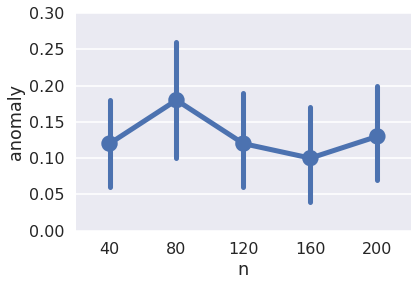

In [353]:
ns, anomalies = [], []
for n_students in range(40, 201, 40):
    for i_experiment in range(200):
        ns.append(n_students)
        anomalies.append(
            evaluate_system_once(
                n_iters_system=50,
                n_students=n_students,
                patience=3,
                noise=0.2,
                proxy_objective=proxy_objective_effective_tasks))
df = pd.DataFrame({'students': ns, 'anomaly': anomalies})
ax = sns.pointplot(x='students', y='anomaly', data=df)
ax.set_ylim(0, 0.3)